<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
# load the csv file

# type your code here
life=pd.read_csv('Life_Expectancy.csv')
life.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [3]:
life.shape

(124, 18)

In [46]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

In [47]:
life.describe()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,160.475806,27.637097,85.104839,2841.637097,41.733871,36.798387,86.637097,87.919355,0.819355,6866.816502,19606036.048387,4.180645,4.373387,0.690685,13.085484,71.220968
std,101.794506,94.347510,20.839229,11517.586950,21.186385,122.248912,21.653342,19.122879,1.764127,10885.243579,41007621.897546,4.086736,4.212797,0.168296,2.909242,8.467924
min,3.000000,0.000000,6.000000,0.000000,2.100000,0.000000,6.000000,6.000000,0.100000,5.668726,8381.000000,0.300000,0.200000,0.332000,5.300000,48.600000
25%,73.500000,1.000000,82.000000,0.750000,20.950000,1.000000,88.000000,89.000000,0.100000,639.799727,821556.000000,1.500000,1.575000,0.551500,10.875000,65.175000
50%,139.500000,10.000000,94.000000,37.000000,54.100000,12.000000,95.000000,95.000000,0.100000,2728.291765,4234054.000000,2.400000,2.800000,0.740000,13.300000,72.200000
75%,234.000000,21.000000,97.000000,588.750000,59.750000,26.500000,98.000000,98.000000,0.400000,8437.562894,14827671.000000,6.425000,6.425000,0.799000,15.000000,77.500000
max,438.000000,910.000000,99.000000,90387.000000,71.400000,1100.000000,99.000000,99.000000,8.100000,56554.387600,258162113.000000,26.700000,27.300000,0.945000,20.400000,86.000000


In [48]:
life.skew() #-5-----> 5

Adult_Mortality       0.588472
Infant_Deaths         7.816143
Hepatitis            -2.317231
Measles               5.635226
 BMI                 -0.421571
Underfive_Deaths      7.269122
Polio                -2.633000
Diphtheria           -2.880857
 HIV                  3.077187
GDP                   2.530833
Population            3.304973
Malnourished10_19     2.429036
Malnourished5_9       2.318286
Income_Index         -0.558301
Schooling            -0.109486
Expected             -0.501548
dtype: float64

In [3]:
life_num=life.select_dtypes(np.number)
life_cat=life.select_dtypes(object)

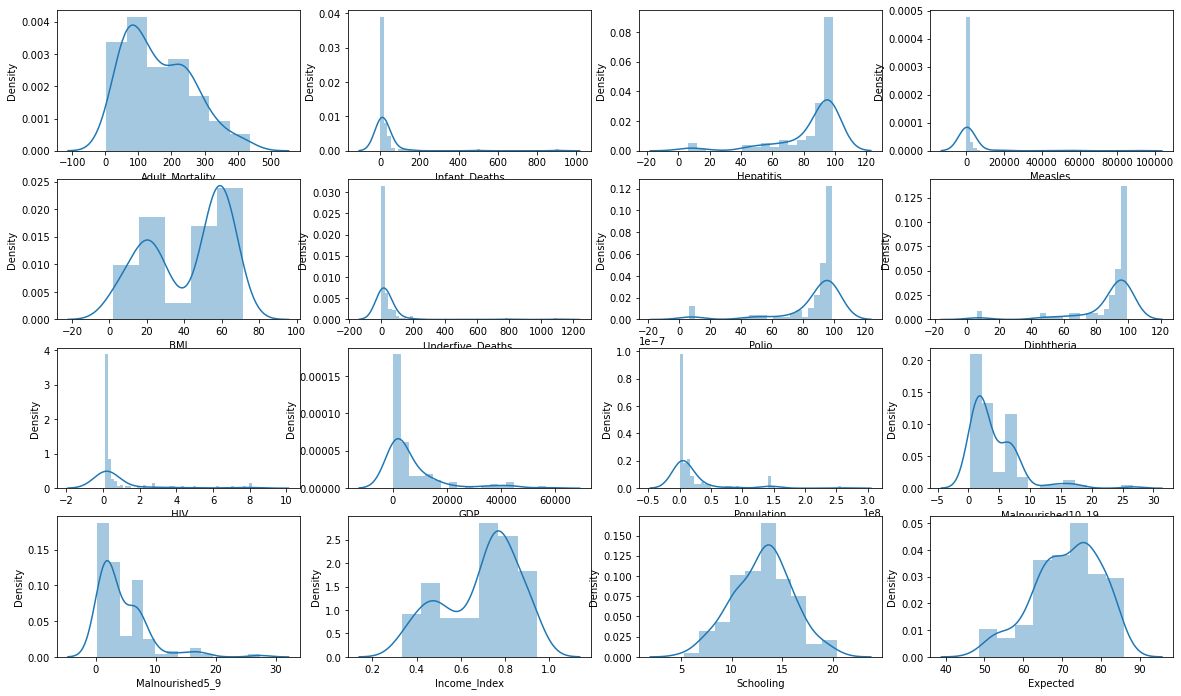

In [4]:
plt.figure(figsize=(20,15))
j=1
for i in life_num.columns:
    plt.subplot(5,4,j)
    sns.distplot(life_num[i])
    j+=1

In [ ]:
#some skweness in some of the atributes 

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
life['Adult_Mortality'].corr(life['Expected'])

-0.7108678534954708

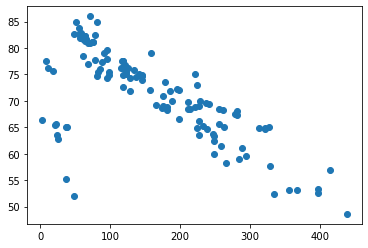

In [8]:
plt.scatter(x=life['Adult_Mortality'],y=life['Expected'])

In [9]:
life['Adult_Mortality'].corr(life['Expected'])

-0.7108678534954708

In [ ]:
#negatively correlated.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
import statsmodels
import statsmodels.api as sm

X=life['Income_Index']
y=life['Expected']

In [11]:
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.13e-34
Time:                        15:05:01   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
ypred=model1.predict()

In [13]:
res=y-ypred

In [14]:
sum_res=np.sum(res)

In [17]:
errors=sum_res/life.shape[0]

In [60]:
print(sum_res,errors)

-1.7621459846850485e-12 -1.4210854715202004e-14


In [ ]:
#error value is close to zero

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
X=life.iloc[:,[4,8,9]]
y=life['Expected']

In [19]:
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           0.000468
Time:                        15:05:33   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2,adj r2 is not that high,...so the model is not that significant..
#B0:57
#B1:negative relation
#B2: positive relation
#B3 :positive relation

In [ ]:
#we can consider 'Polio' and 'Diphtheria'  as a good significant relation.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
X=life.iloc[:,[4,8,9]]
y=life['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(life['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
model1=sm.OLS(y,X).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.00e-09
Time:                        15:05:37   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R2,adj r2 is very low,...so the model is not that significant.

In [ ]:
#B0:69
#B1:negative co-relation
#B2: positive co-relation
#B3 :positive co-relation

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
X=life.iloc[:,2:16]
y=life['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(life['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
model1=sm.OLS(y,X).fit()
model1.summary()
np.round(model1.pvalues[model1.pvalues<0.05],6)

const               0.000000
Adult_Mortality     0.000000
Hepatitis           0.031500
 HIV                0.000157
Population          0.026100
Income_Index        0.000000
status_Developing   0.033838
dtype: float64

In [ ]:
# all of the above are the significant variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
X=life.iloc[:,[11,15]]
y=life['Expected']
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
ypred=model1.predict(X)

In [28]:
SSR=np.sum((ypred-np.mean(y))**2)
SSE=np.sum((ypred-y)**2)
SST=SSR+SSE

print('SSR',SSR,'SSE',SSE,'SST',SST)

SSR 6292.571603999841 SSE 2527.2338798711353 SST 8819.805483870976


In [ ]:
#total variation for the observed values of life expectancy SST 8819.805483870976

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here
X=life.iloc[:,[15]]
y=life['Expected']

model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              5225.
Date:                Fri, 30 Jul 2021   Prob (F-statistic):                   1.28e-102
Time:                        21:36:31   Log-Likelihood:                         -471.89
No. Observations:                 124   AIC:                                      945.8
Df Residuals:                     123   BIC:                                      948.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Income_Index    99.7408      1.380     72.285      0.000      97.009     102.472
==============================================================================
Omnibus:                       10.401   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.305
Skew:                           0.719   Prob(JB):                      0.00351
Kurtosis:                       2.652   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model1.conf_int()

,0,1
Income_Index,97.009477,102.472029


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
X=life.iloc[:,[2,3,7]]
y=life['Expected']
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.29e-19
Time:                        15:45:11   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality      -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths         0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths     -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X=life.iloc[:,[2,3,7,12]]
y=life['Expected']
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           8.93e-19
Time:                        15:46:05   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.019     78.813      0.000      78.289      82.325
Adult_Mortality      -0.0550      0.006     -9.929      0.000      -0.066      -0.044
Infant_Deaths         0.0886      0.050      1.788      0.076      -0.010       0.187
Underfive_Deaths     -0.0760      0.038     -1.975      0.051      -0.152       0.000
Population         4.736e-09   1.31e-08      0.361      0.718   -2.12e-08    3.07e-08
==============================================================================
Omnibus:                       54.418   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.042
Skew:                          -1.738   Prob(JB):                     8.69e-32
Kurtosis:                       6.949   Cond. No.                     8.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#since r2 value are same but since there is littile reductuction in adj r2 so we can say model not much improved.

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

ypred1=model1.predict(X)
ypred2=model2.predict(X)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
X=life.iloc[:,1:17]
y=life['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(life['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.94e-36
Time:                        16:27:33   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality       -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths          0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis              0.0656      0.032      2.056      0.042       0.002       0.129
Measles             -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
 BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths      -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                 -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria            -0.0345      0.040     -0.868      0.387      -0.113       0.044
 HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                 5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population         -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19     -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9        0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index          18.6518      6.313      2.955      0.004       6.138      31.166
Schooling              0.3599      0.346      1.040      0.301      -0.326       1.046
status_Developing     -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#model is not significance because fpvalue is smaller than 0.05

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here
from scipy.stats import shapiro
X=life.iloc[:,1:17]
y=life['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(life['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()

In [43]:
stat,p_val=shapiro(model_full.resid)
p_val

0.03209252282977104

In [44]:
#not normally distributed

<AxesSubplot:ylabel='Density'>

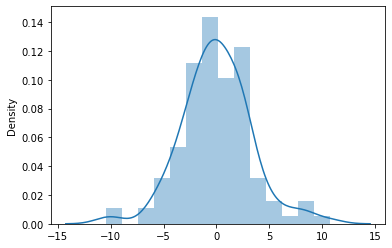

In [45]:
sns.distplot(model_full.resid)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
X=life.iloc[:,1:]
y=life['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(life['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.904e+20
Date:                Fri, 30 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:02:56   Log-Likelihood:                 2341.3
No. Observations:                 124   AIC:                            -4647.
Df Residuals:                     106   BIC:                            -4596.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.18e-12   3.23e-09      0.000      1.000    -6.4e-09     6.4e-09
Adult_Mortality     6.176e-16   2.16e-12      0.000      1.000   -4.28e-12    4.28e-12
Infant_Deaths       2.109e-15   1.74e-11      0.000      1.000   -3.45e-11    3.45e-11
Hepatitis          -1.898e-14   1.52e-11     -0.001      0.999   -3.01e-11    3.01e-11
Measles            -1.763e-15   2.86e-14     -0.062      0.951   -5.84e-14    5.49e-14
 BMI                1.125e-14   1.06e-11      0.001      0.999    -2.1e-11     2.1e-11
Underfive_Deaths    1.388e-17   1.28e-11   1.09e-06      1.000   -2.53e-11    2.53e-11
Polio              -1.388e-16   1.02e-11  -1.36e-05      1.000   -2.03e-11    2.03e-11
Diphtheria         -6.661e-16   1.86e-11  -3.57e-05      1.000    -3.7e-11     3.7e-11
 HIV               -3.109e-15   1.33e-10  -2.33e-05      1.000   -2.65e-10    2.65e-10
GDP                 5.476e-16   1.64e-14      0.033      0.973   -3.19e-14     3.3e-14
Population           3.37e-17    4.1e-18      8.220      0.000    2.56e-17    4.18e-17
Malnourished10_19   -2.22e-16   1.42e-10  -1.56e-06      1.000   -2.81e-10    2.81e-10
Malnourished5_9    -3.331e-16   1.33e-10  -2.51e-06      1.000   -2.63e-10    2.63e-10
Income_Index       -2.842e-14   3.07e-09  -9.27e-06      1.000   -6.08e-09    6.08e-09
Schooling           8.882e-16   1.62e-10   5.47e-06      1.000   -3.22e-10    3.22e-10
Expected               1.0000   4.51e-11   2.22e+10      0.000       1.000       1.000
status_Developing  -1.776e-15   5.53e-10  -3.21e-06      1.000    -1.1e-09     1.1e-09
==============================================================================
Omnibus:                      109.874   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.990
Skew:                          -3.253   Prob(JB):                    4.07e-193
Kurtosis:                      14.365   Cond. No.                     1.02e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#status and gdp has p_val greater than 0.05 so they are not significant.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
X=life.iloc[:,1:17]
y=life['Expected']

status_encode=pd.get_dummies(life['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Wed, 28 Jul 2021   Prob (F-statistic):                   4.84e-108
Time:                        17:10:22   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
status_Developing      7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#with out intercept or avg life expectancy for all variable by default is 0 is not possible so this is not a good model all though we have 99% accurecy

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [3]:
df_fev=pd.read_csv('FEV_data.csv')
df_fev.head()


,Age,Height (cm),Sex,Smoke_habit,FEV
0,16,157.000000,F,smoker,1.708000
1,17,167.500000,F,smoker,1.724000
2,19,154.500000,F,smoker,1.720000
3,16,163.000000,M,smoker,1.558000
4,16,157.000000,M,smoker,1.895000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
df_fev_num=df_fev.select_dtypes(np.number)
df_fev_cat=df_fev.select_dtypes(object)

In [5]:
df_fev_num.corr()

,Age,Height (cm),FEV
Age,1.000000,0.164519,0.142240
Height (cm),0.164519,1.000000,0.828025
FEV,0.142240,0.828025,1.000000


In [ ]:
#Height is having higher correlation with the FEV

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
X=df_fev['Smoke_habit']
X=pd.get_dummies(X,drop_first=True)
y=df_fev['FEV']
X=sm.add_constant(X)
model_1st=sm.OLS(y,X).fit()
model_1st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           2.36e-16
Time:                        20:46:54   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4206      0.098     34.729      0.000       3.227       3.614
smoker        -0.8778      0.104     -8.422      0.000      -1.082      -0.673
==============================================================================
Omnibus:                       37.782   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.957
Skew:                           0.622   Prob(JB):                     4.70e-10
Kurtosis:                       3.167   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# the model is not a significance model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
dummy_var=pd.get_dummies(df_fev_cat,drop_first=True)
df_fev_num=df_fev_num.drop('FEV',axis=1)

In [8]:
X=pd.concat([df_fev_num,dummy_var],axis=1)
y=df_fev['FEV']
final_model=sm.OLS(y,sm.add_constant(X)).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.78e-168
Time:                        20:46:59   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age                    0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)            0.1192      0.003     34.063      0.000       0.112       0.126
Sex_M                  0.1801      0.038      4.769      0.000       0.106       0.254
Smoke_habit_smoker    -0.2231      0.063     -3.515      0.000      -0.348      -0.098
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#by looking at the condition number we can easily say there is multi colinearity present.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(final_model.resid)

1.6472983005218602

In [ ]:
##durbin watson value is close to 2 so we say that not much  auto correlation or we can say error terms are serially independent.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:ylabel='Density'>

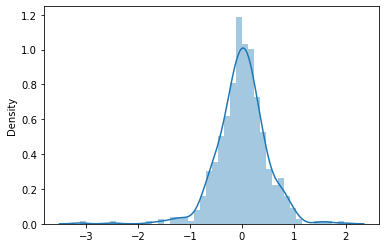

In [25]:
sns.distplot(final_model.resid)

In [22]:
# type your code here
final_model.resid.skew()

-0.6269115301329797

In [ ]:
#by looking at the graph and checking the skewness of the data we can say the residuals are almost normally distributed.

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
X = pd.concat([df_fev_num,dummy_var],axis=1)
y = df_fev["FEV"]
X=sm.add_constant(X)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, random_state=10)

final_model = sm.OLS(y_train,X_train).fit()

final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     263.9
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          9.48e-117
Time:                        21:10:50   Log-Likelihood:                -312.14
No. Observations:                 457   AIC:                             634.3
Df Residuals:                     452   BIC:                             654.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4435      0.691    -23.784      0.000     -17.802     -15.085
Age                   -0.0021      0.008     -0.254      0.800      -0.018       0.014
Height (cm)            0.1193      0.004     28.303      0.000       0.111       0.128
Sex_M                  0.1723      0.046      3.751      0.000       0.082       0.263
Smoke_habit_smoker    -0.2314      0.074     -3.142      0.002      -0.376      -0.087
==============================================================================
Omnibus:                       69.972   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.391
Skew:                          -0.441   Prob(JB):                     4.30e-98
Kurtosis:                       7.772   Cond. No.                     4.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
ypred=final_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error


In [38]:
ms_error= mean_squared_error(y_test, ypred)
print("MSE: ", ms_error)
test_rmse = np.sqrt(ms_error)
print("RMSE: ",test_rmse)

MSE:  0.2147934700558578
RMSE:  0.4634581642994951


In [39]:
# as rmse value is quite small we can infer that smaller is rmse better our model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [33]:
test_mae=round(mean_absolute_error(y_test,ypred),4)
print('MAE VALUE : ',test_mae)
test_mape=round(mape(y_test,ypred),4)
print('The MAPE value :',test_mape)

MAE VALUE :  0.3334
The MAPE value : 14.0775


In [ ]:
#percentage error is 14% so our model accurecy around 86% so we can say our model accuracy not that bad.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here
FEV_num = df_fev.select_dtypes(include=np.number).drop(["FEV"],axis=1)
FEV_cat = df_fev.select_dtypes(include="object")
dummy_variables = pd.get_dummies(FEV_cat, drop_first=True)
X = pd.concat([FEV_num, dummy_variables],axis=1)
X = sm.add_constant(X)
y = df_fev["FEV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
MLR_model = sm.OLS(y, X).fit()
print(MLR_model.summary())

train_pred = MLR_model.predict(X_train)
test_pred = MLR_model.predict(X_test)


                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.78e-168
Time:                        21:29:55   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0

In [42]:
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = round(np.sqrt(train_mse), 4)
print("RMSE on train set: ",train_rmse)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("\n Root Mean Squared Error (RMSE) on test set: ", rmse_test)


RMSE on train set:  0.4694

 Root Mean Squared Error (RMSE) on test set:  0.4928
